# Exploratory Data Analysis

In [1]:
import pandas as pd
df_cl = pd.read_csv('example_classification.csv')
df_cl.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,4
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,2
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,4


In [2]:
import pandas as pd

df_rg = pd.read_csv('example_regression.csv')
df_rg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Describe

In [3]:
df_cl.describe()

,recency,history,mens,womens,newbie,visit,conversion,spend,DM_category
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781,0.009031,1.050908,3.851750
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890,0.094604,15.036448,2.131944
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000,11.000000


In [4]:
df_cl.describe(include=["object", "bool"])

,history_segment,zip_code,channel,segment
count,64000,64000,64000,64000
unique,7,3,3,3
top,1) $0 - $100,Surburban,Web,Womens E-Mail
freq,22970,28776,28217,21387


## Value counts

In [5]:
for col in df_cl.describe(include=["object", "bool"]).columns:
    print(f'-------- {col} --------')
    print(df_cl[col].value_counts(normalize=True))
    print()

-------- history_segment --------
history_segment
1) $0 - $100        0.358906
2) $100 - $200      0.222719
3) $200 - $350      0.192016
4) $350 - $500      0.100141
5) $500 - $750      0.076734
6) $750 - $1,000    0.029047
7) $1,000 +         0.020438
Name: proportion, dtype: float64

-------- zip_code --------
zip_code
Surburban    0.449625
Urban        0.400953
Rural        0.149422
Name: proportion, dtype: float64

-------- channel --------
channel
Web             0.440891
Phone           0.437828
Multichannel    0.121281
Name: proportion, dtype: float64

-------- segment --------
segment
Womens E-Mail    0.334172
Mens E-Mail      0.332922
No E-Mail        0.332906
Name: proportion, dtype: float64



## Statistics parameters depending on class

In [6]:
df_cl.describe(include='object')

,history_segment,zip_code,channel,segment
count,64000,64000,64000,64000
unique,7,3,3,3
top,1) $0 - $100,Surburban,Web,Womens E-Mail
freq,22970,28776,28217,21387


In [7]:
df_cl[df_cl['zip_code'] == 'Rural'].describe(include='object')

,history_segment,zip_code,channel,segment
count,9563,9563,9563,9563
unique,7,1,3,3
top,1) $0 - $100,Rural,Web,Mens E-Mail
freq,3388,9563,4238,3243


In [8]:
df_cl[df_cl['zip_code'] == 'Rural']['history'].mean()

np.float64(242.85393495764924)

## Apply functions to cell

In [9]:
import numpy as np
df_cl.apply(np.max)

recency                       12
history_segment      7) $1,000 +
history                  3345.93
mens                           1
womens                         1
zip_code                   Urban
newbie                         1
channel                      Web
segment            Womens E-Mail
visit                          1
conversion                     1
spend                      499.0
DM_category                   11
dtype: object

In [10]:
df_cl['segment'].value_counts()

segment
Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: count, dtype: int64

In [11]:
df_cl[df_cl['DM_category'].apply(lambda dm_cat: dm_cat>5)]['segment'].value_counts()

segment
No E-Mail    11787
Name: count, dtype: int64

In [12]:
# d = {"No": False, "Yes": True}
# df[example_of_feature] = df[example_of_feature].map(d)
# df = df.replace({example_of_feature: d})

`df.groupby(by=grouping_columns)[columns_to_show].function()`

In [13]:
df_cl.groupby(by='DM_category')['segment'].count()

DM_category
1      9647
2      9558
3      9568
4      9622
5     13818
6      9638
11     2149
Name: segment, dtype: int64

In [14]:
df_cl

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,DM_category
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,4
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,11
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,2
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0,2
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0,3
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0,2
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0,4


In [15]:
columns_to_show = ["channel"]

df_cl.groupby(["DM_category"])[columns_to_show].describe(percentiles=[])

channel                    
              count unique    top  freq
DM_category                            
1              9647      3  Phone  4400
2              9558      3    Web  4330
3              9568      3    Web  4377
4              9622      3  Phone  4335
5             13818      3    Web  5847
6              9638      3    Web  4340
11             2149      3  Phone   729

## Crosstab

In [16]:
#pd.crosstab(df_cl["mens"], df_cl["womens"], normalize=True)
pd.crosstab(df_cl["mens"], df_cl["womens"])

womens,0,1
mens,,
0,0,28734
1,28818,6448


In [17]:
len(df_cl[(df_cl["mens"] == 1) & (df_cl["womens"] == 1)])

6448

## Pivot

In [18]:
df_cl.pivot_table(
    ["mens", "womens"],
    ["recency"],
    aggfunc="mean",
)

,mens,womens
recency,,
1,0.572498,0.578195
2,0.574764,0.555924
3,0.557419,0.560976
4,0.545007,0.559779
5,0.549446,0.554545
6,0.558523,0.538111
7,0.553948,0.531633
8,0.551645,0.529900
9,0.534389,0.536563


## Outliers

In [19]:
def check_outliers(df):
  for col in df.columns:
    print(col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'For {col}: {len(outliers)} ({round(len(outliers)/len(df),3)}%) were found')

In [20]:
check_outliers(df_cl.select_dtypes(include=['number']))

recency
For recency: 0 (0.0%) were found
history
For history: 3593 (0.056%) were found
mens
For mens: 0 (0.0%) were found
womens
For womens: 0 (0.0%) were found
newbie
For newbie: 0 (0.0%) were found
visit
For visit: 9394 (0.147%) were found
conversion
For conversion: 578 (0.009%) were found
spend
For spend: 578 (0.009%) were found
DM_category
For DM_category: 2149 (0.034%) were found


In [21]:
def delete_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

There is another definition of outlier with Z-score: a Z-score above 3 or below -3 is considered an outlier.

In [22]:
from scipy import stats

def remove_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    filtered_df = df[(z_scores < threshold) & (z_scores > -threshold)]
    return filtered_df

## Visualization

In [23]:
import seaborn as sns

<Axes: xlabel='recency', ylabel='count'>

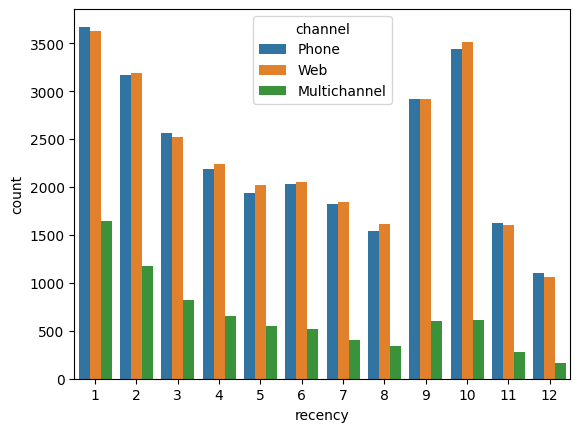

In [24]:
sns.countplot(x="recency", hue="channel", data=df_cl)

<Axes: xlabel='AGE', ylabel='MEDV'>

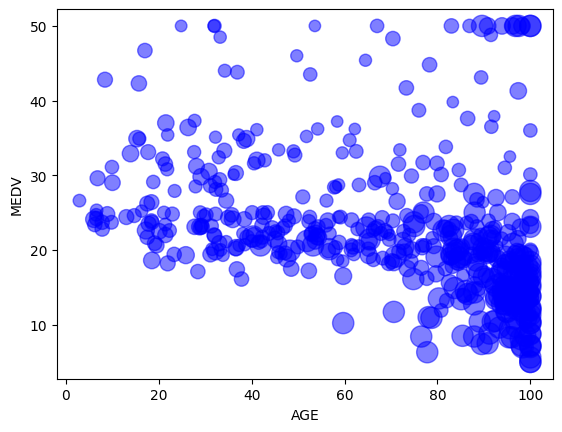

In [25]:
sizes = df_rg['TAX']/df_rg['TAX'].max()
sns.scatterplot(data=df_rg, x='AGE', y='MEDV', 
                marker = "o", color = "blue", linewidths = 1, edgecolors = "blue", 
                s = sizes*250, alpha = 0.5)

<Axes: xlabel='history', ylabel='DM_category'>

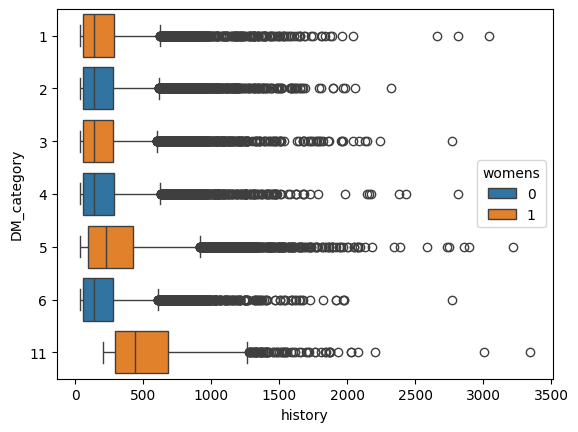

In [26]:
import seaborn as sns
# plt.style.use('seaborn-v0_8-darkgrid')
# plt.figure(figsize=(10, 6))
sns.boxplot(x='history', y='DM_category', hue= 'womens', data=df_cl, orient='h', palette='tab10')
# plt.xlabel('peso')
# plt.ylabel('sexo(1=hombre 0=mujer)')
# plt.title('Distribución de peso por sexo')
# plt.show()

<Axes: xlabel='history', ylabel='DM_category'>

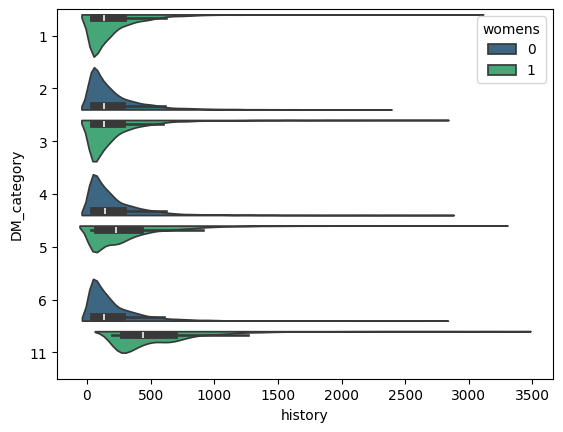

In [61]:
sns.violinplot(x='history', y='DM_category', hue= 'womens', data=df_cl, split=True , orient='h', palette='viridis')

In [29]:
df_example = df_cl.copy()
del df_example['mens']

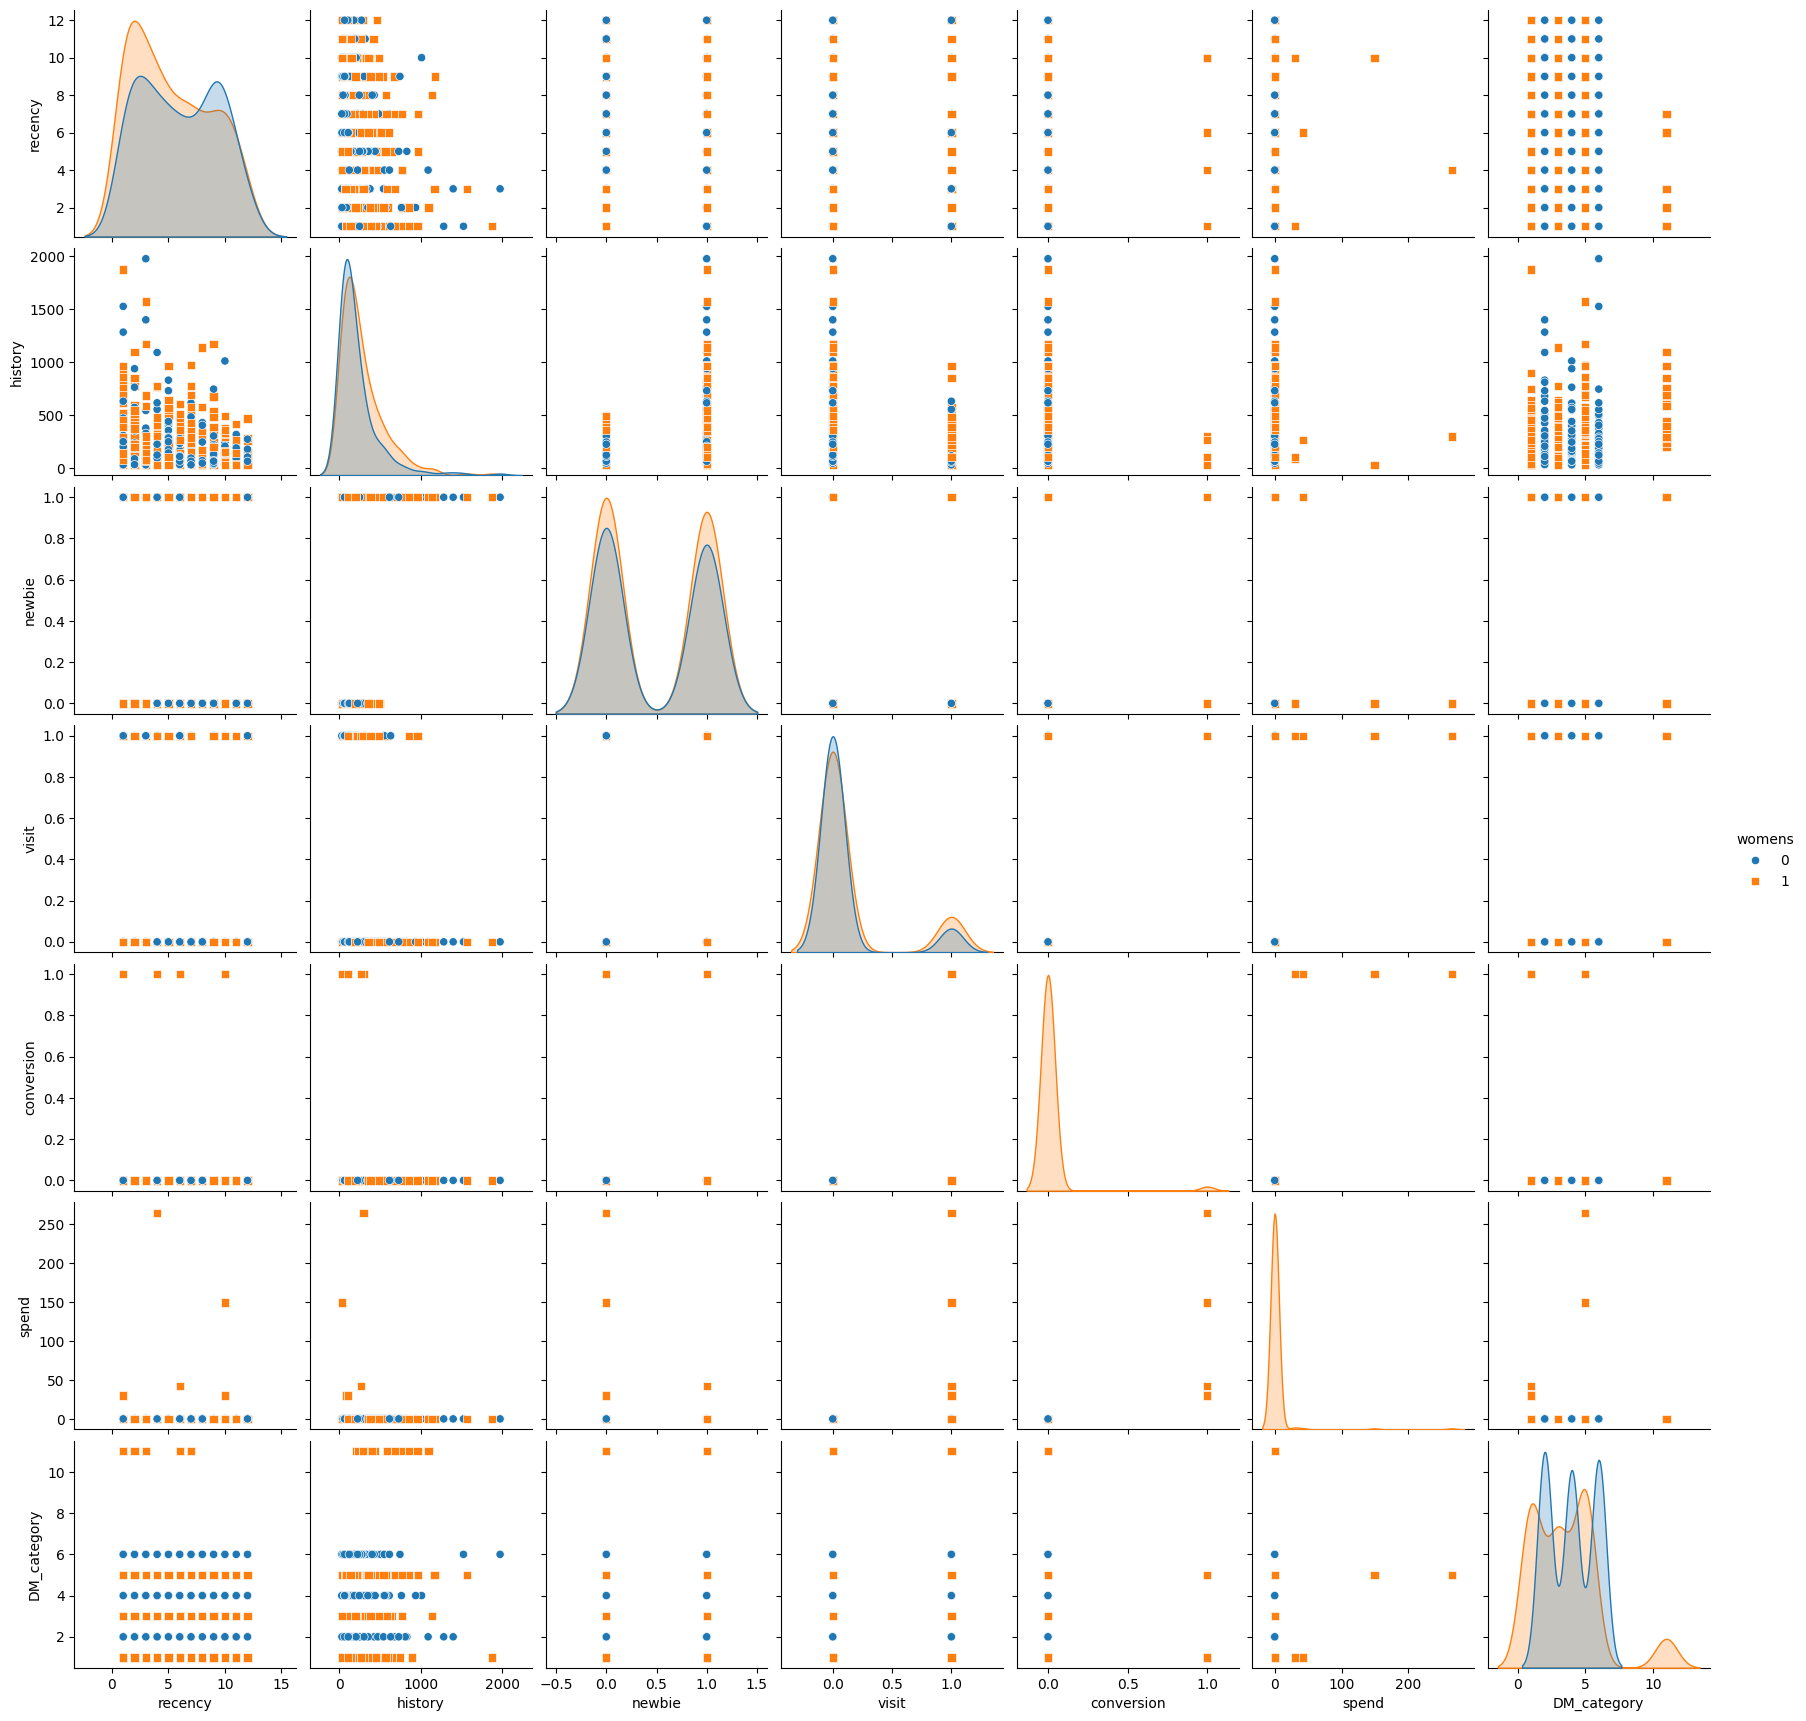

In [30]:
sns.pairplot(df_example.iloc[:500], hue='womens', diag_kind='kde', markers=["o", "s"])

In [32]:
df_rg.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [44]:
df_rg.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE   DIS      RAD  TAX    PTRATIO  B       LSTAT  MEDV
88.97620  0.0   18.10  0     0.671  6.968  91.9  1.4165   24   666.0  20.2     396.90  17.21  10.4    1
0.00632   18.0  2.31   0     0.538  6.575  65.2  4.0900   1    296.0  15.3     396.90  4.98   24.0    1
0.00906   90.0  2.97   0     0.400  7.088  20.8  7.3073   1    285.0  15.3     394.72  7.85   32.2    1
0.01096   55.0  2.25   0     0.389  6.453  31.9  7.3073   1    300.0  15.3     394.72  8.23   22.0    1
0.01301   35.0  1.52   0     0.442  7.241  49.3  7.0379   1    284.0  15.5     394.74  5.49   32.7    1
                                                                                                     ..
0.01870   85.0  4.15   0     0.429  6.516  27.7  8.5353   4    351.0  17.9     392.43  6.36   23.1    1
0.01778   95.0  1.47   0     0.403  7.135  13.9  7.6534   3    402.0  17.0     384.30  4.45   32.9    1
0.01709   90.0  2.02   0     0.410  6.728  36.1  12.1265  5    187.0 

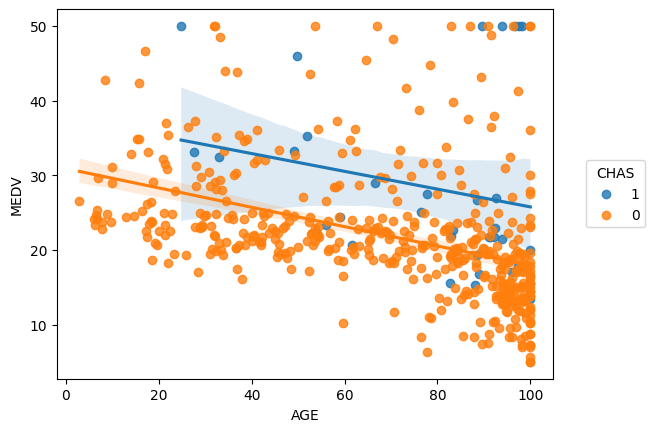

In [48]:
ax = sns.regplot(data=df_rg[df_rg['CHAS']==1], x="AGE", y="MEDV", label='1')
ax = sns.regplot(data=df_rg[df_rg['CHAS']==0], x="AGE", y="MEDV", label='0')
ax.legend(title='CHAS', loc='center right', bbox_to_anchor=(1.2, 0.5))

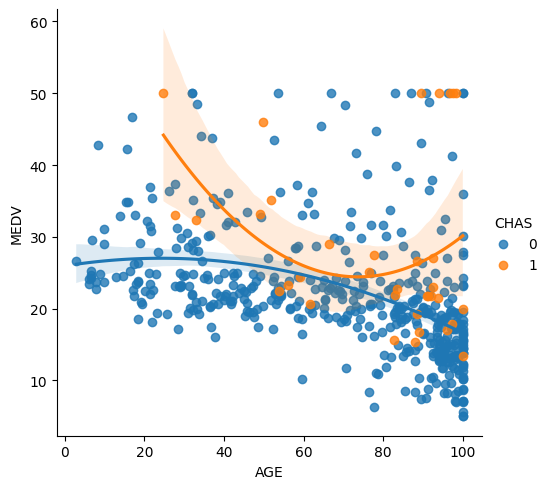

In [52]:
sns.lmplot(x="AGE", y="MEDV", hue="CHAS", data=df_rg, order=2)

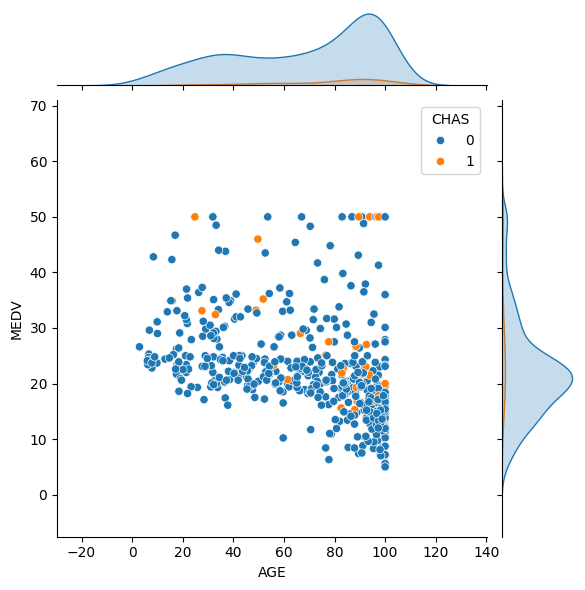

In [53]:
sns.jointplot(data=df_rg, x="AGE", y="MEDV", hue="CHAS")

<Axes: xlabel='AGE', ylabel='Count'>

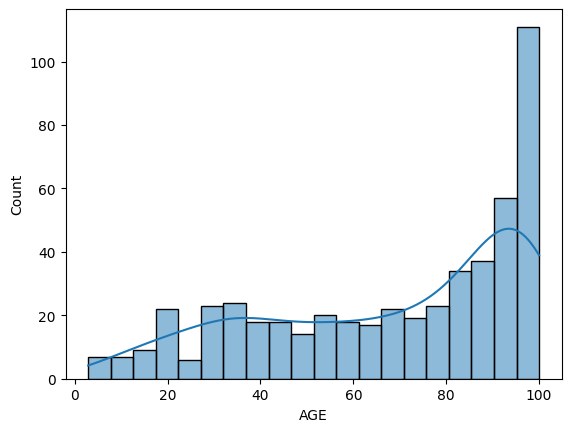

In [54]:
sns.histplot(df_rg['AGE'], bins=20, kde=True)

<Axes: xlabel='RAD', ylabel='MEDV'>

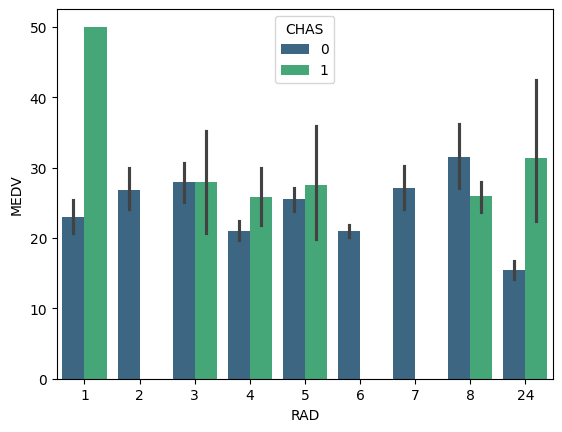

In [60]:
sns.barplot(x='RAD', y='MEDV', hue='CHAS', data=df_rg, palette='viridis')